In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [95]:
x = [i for i in range(50)]
print(x)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [96]:
y = [3 * j + random.normalvariate(0,10) for j in range(50)]
print(y)

[10.990410420518542, 28.212502536738434, 6.351362844857919, 17.599129042886, 25.23243929113006, 19.101406314211168, 4.501026348345398, 19.184053098725943, 43.82796999133389, 20.78576137871673, 21.23077284277508, 56.95332068543584, 29.076307532249768, 27.50782869897767, 55.095334891090154, 30.69431697003238, 66.12293140465418, 63.65285132139978, 55.55328305863234, 60.0229787802976, 64.84341752652374, 62.229959543865334, 62.14252845468873, 71.22180484260873, 71.05720521849379, 73.52891228683761, 80.96941626050871, 102.04030878342601, 83.46643139378386, 78.5164282672055, 78.17281767992515, 107.57022135384442, 101.74219283671005, 99.87496829806302, 88.48416763686807, 127.32863377081416, 114.60422208099664, 117.77864631557036, 100.52328697529637, 131.8653373663178, 126.05056373522035, 105.28464494014406, 127.65053258207998, 141.23797656474477, 116.71642939403063, 137.373817463177, 145.20303480279466, 145.00911101014108, 136.56365523959226, 137.6155969755452]


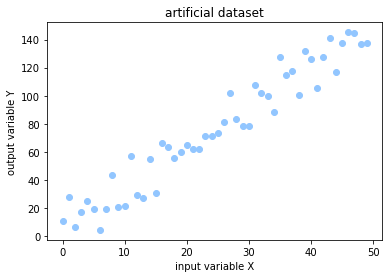

In [97]:
plt.scatter(x,y)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.show()

In [98]:
np.ones(len(x))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [99]:
X = np.c_[np.ones(len(x)), x]

In [100]:
beta_v1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v1)

[6.17931236 2.84848705]


In [101]:
x1 = np.linspace(0, max(x), 100, endpoint=True)
y1=beta_v1[1]*x1 + beta_v1[0]

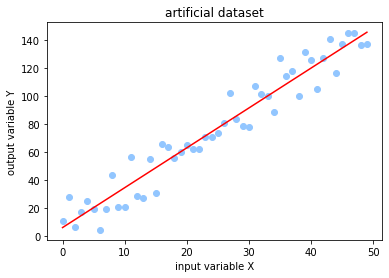

In [102]:
plt.scatter(x,y)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.plot(x1,y1,'r')
plt.show()

General Linear Regresstion~~~~~~~~~~~~~~~~~~~~~~~~~~~`

In [103]:
from mpl_toolkits.mplot3d import Axes3D

In [104]:
advertising = pd.read_csv('Advertising.csv', index_col=0)

In [105]:
advertising.head(3)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [106]:
advertising.shape

(200, 4)

In [107]:
advertising.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [108]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


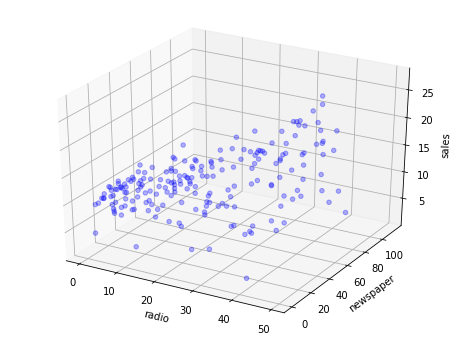

In [109]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(advertising['radio'], advertising['newspaper'], advertising['sales'], c='b', marker='o', alpha = 0.3)

ax.set_xlabel('radio')
ax.set_ylabel('newspaper')
ax.set_zlabel('sales')

plt.show()

In [110]:
X = advertising[['TV', 'radio', 'newspaper']]
Y = advertising['sales']

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

160
40
160
40


In [112]:
X.head(3)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3


In [113]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [114]:
model.intercept_

2.979067338122629

In [115]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [116]:
beta_v2 = model.coef_
beta_v2 = np.insert(beta_v2, 0, model.intercept_)
print(beta_v2)

[2.97906734e+00 4.47295175e-02 1.89195054e-01 2.76111434e-03]


In [117]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)

LR_v1:	 [6.17931236 2.84848705]
LR_v2:	 [2.97906734e+00 4.47295175e-02 1.89195054e-01 2.76111434e-03]


In [118]:
Y_hat = model.predict(X_test)

(array([4., 3., 3., 1., 1., 6., 6., 7., 4., 5.]),
 array([-3.60349333, -2.98438132, -2.36526932, -1.74615731, -1.1270453 ,
        -0.50793329,  0.11117871,  0.73029072,  1.34940273,  1.96851473,
         2.58762674]),
 <a list of 10 Patch objects>)

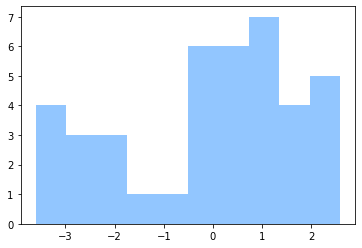

In [119]:
error = Y_test - Y_hat
plt.hist(error)

In [120]:
index = np.where(np.abs(error) >= 3, True, False)

TypeError: list indices must be integers or slices, not tuple

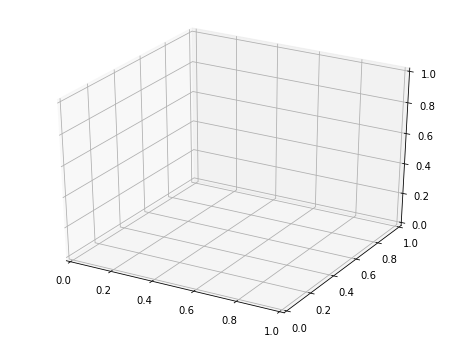

In [121]:
plt.style.use('seaborn-pastel')

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# Error의 절대값이 3이 넘지 않는 데이터포인트는 파란색('b'), 그렇지 않은 포인트는 빨간색('r')로 표시
ax.scatter(x[~index,0], x[~index,1], y[~index], c='b', marker='o', alpha = 0.3)
ax.scatter(x[index,0], x[index,1], y[index], c='r', marker='o', alpha = 0.5)

# Regression plane를 x1와 x2에 대한 함수로 정의
plane = lambda x1, x2: beta_v2[0] + beta_v2[1] * x1 + beta_v2[2] * x2 

# Regression plane의 영역을 (대충) 정의한 코드
grid_x1, grid_x2 = np.mgrid[0:70, 0:100]
ax.plot_surface(grid_x1, grid_x2, plane(grid_x1, grid_x2), color = 'k', alpha = 0.1)

ax.set_xlabel('radio')
ax.set_ylabel('newspaper')
ax.set_zlabel('sales')

plt.show()

In [122]:
from sklearn import metrics

In [123]:
metrics.r2_score(Y_test, Y_hat)

0.899438024100912

In [124]:
metrics.mean_squared_error(Y_test, Y_hat)

3.174097353976104